# Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
from numpy.linalg import matrix_power
from scipy.stats import norm
from numpy.linalg import inv

# Generowanie punktów

In [2]:
def generate_points(covariance, translation, samples):
    random_x = norm.ppf(np.random.uniform(low=0, high=1, size=(samples,1)))
    random_y = norm.ppf(np.random.uniform(low=0,  high=1, size=(samples, 1)))
    y = np.hstack([random_x, random_y]).transpose()
    lambdas, K = eig(covariance)
    sqrtA = np.diag(np.sqrt(lambdas))
    x = np.dot(np.dot(K, sqrtA), y).transpose()
    for elem in x:
        elem += translation
    return x

# Wyznaczanie macierzy kowariancji

In [3]:
def covariance_matrix(data, means):
    centered_data = data - means
    cov_matrix = np.dot(centered_data.T, centered_data) / (data.shape[0] - 1)
    return  cov_matrix

# Klasyfikacja bayesowska na podstawie estymatorów

In [4]:
def bayesian_estimated(x1, x2):
    p_1 = len(x1) / (len(x1)+len(x2))
    p_2 = 1 - p_1
    enlarge_factor = 1.5
    # Estymacja
    m_1 = np.mean(x1, axis=0)
    m_2 = np.mean(x2, axis=0)
    S_1 = covariance_matrix(x1, m_1)
    S_2 = covariance_matrix(x2, m_2)
    S_p = (S_1 + S_2) / 2
    
    minx = min(x1.min(axis=0)[0], x2.min(axis=0)[0])
    maxx = max(x1.max(axis=0)[0], x2.max(axis=0)[0])
    miny = min(x1.min(axis=0)[1], x2.min(axis=0)[1])
    maxy = max(x1.max(axis=0)[1], x2.max(axis=0)[1])
    diffx = (maxx - minx) / enlarge_factor
    diffy = (maxy-miny) / enlarge_factor
    x = np.linspace(minx-diffx, maxx+diffx, 400)
    y = np.linspace(miny-diffy, maxy+diffy, 400)
    x, y = np.meshgrid(x, y)
    
    points = np.column_stack((x.flatten(), y.flatten()))
    z_1 = np.log(p_1) - 0.5 * np.log(np.linalg.det(S_1)) - 0.5 * np.sum(np.dot((points-m_1), np.linalg.inv(S_1))* (points - m_1), axis = 1)
    z_2 = np.log(p_2) - 0.5 * np.log(np.linalg.det(S_2)) - 0.5 * np.sum(np.dot((points-m_2), np.linalg.inv(S_2))* (points - m_2), axis = 1)
    z = np.where(z_1 > z_2, 1, 0)
    z = z.reshape(x.shape)
    
    plt.contourf(x, y, z, levels=[-1, 0.5, 2], colors=['green', 'yellow'])
    plt.scatter(x1[:, 0], x1[:, 1], color='blue')
    plt.scatter(x2[:, 0], x2[:, 1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    legend_labels = {0: 'Klasa 2', 1: 'Klasa 1'}
    legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor='none') for color in ['green', 'yellow']]
    plt.legend(legend_handles, legend_labels.values(), loc='upper right')
    plt.title("Estimated classification")
    plt.show()

# Klasyfikacja bayesowska na podstawie dokładnych wartości

In [5]:
def bayesian_exact(x1, x2, m_1, m_2, S_1, S_2):
    p_1 = len(x1) / (len(x1)+len(x2))
    p_2 = 1 - p_1
    enlarge_factor = 1.5
    S_p = (S_1 + S_2) / 2
    
    minx = min(x1.min(axis=0)[0], x2.min(axis=0)[0])
    maxx = max(x1.max(axis=0)[0], x2.max(axis=0)[0])
    miny = min(x1.min(axis=0)[1], x2.min(axis=0)[1])
    maxy = max(x1.max(axis=0)[1], x2.max(axis=0)[1])
    diffx = (maxx - minx) / enlarge_factor
    diffy = (maxy-miny) / enlarge_factor
    x = np.linspace(minx-diffx, maxx+diffx, 400)
    y = np.linspace(miny-diffy, maxy+diffy, 400)
    x, y = np.meshgrid(x, y)
    
    points = np.column_stack((x.flatten(), y.flatten()))
    z_1 = np.log(p_1) - 0.5 * np.log(np.linalg.det(S_1)) - 0.5 * np.sum(np.dot((points-m_1), np.linalg.inv(S_1))* (points - m_1), axis = 1)
    z_2 = np.log(p_2) - 0.5 * np.log(np.linalg.det(S_2)) - 0.5 * np.sum(np.dot((points-m_2), np.linalg.inv(S_2))* (points - m_2), axis = 1)
    z = np.where(z_1 > z_2, 1, 0)
    z = z.reshape(x.shape)
    
    plt.contourf(x, y, z, levels=[-1, 0.5, 2], colors=['green', 'yellow'])
    plt.scatter(x1[:, 0], x1[:, 1], color='blue')
    plt.scatter(x2[:, 0], x2[:, 1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    legend_labels = {0: 'Klasa 2', 1: 'Klasa 1'}
    legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor='none') for color in ['green', 'yellow']]
    plt.legend(legend_handles, legend_labels.values(), loc='upper right')
    plt.title("Exact classification")
    plt.show()

In [6]:
covariance1 = np.array([[4, 0], [0, 4]])
translation1 = np.array([0, 0])
covariance2 = np.array([[1, 0], [0, 1]])
translation2 = np.array([10, 0])


# n_1 = 5, n_2 = 5

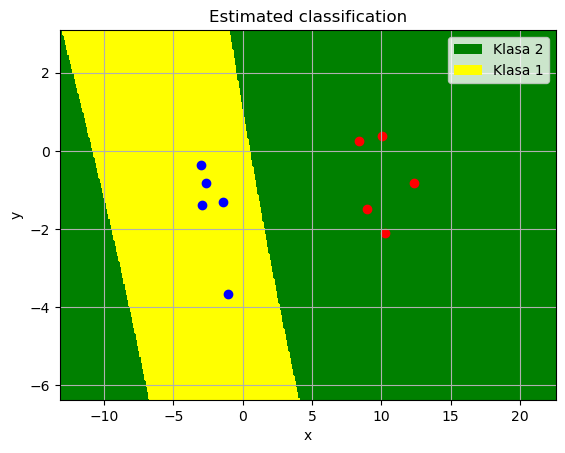

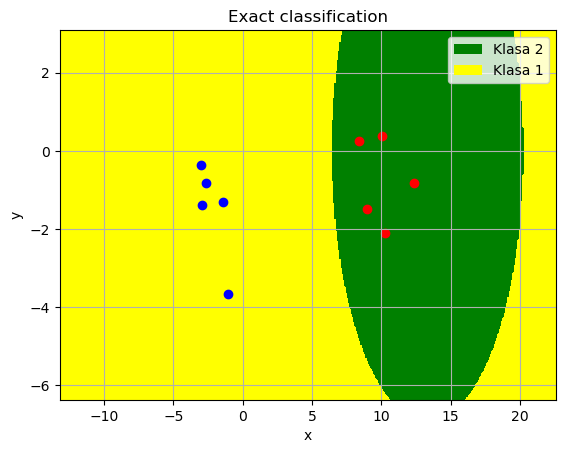

In [7]:
x1 = generate_points(covariance1, translation1, 5)
x2 = generate_points(covariance2, translation2, 5)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 10, n_2 = 10

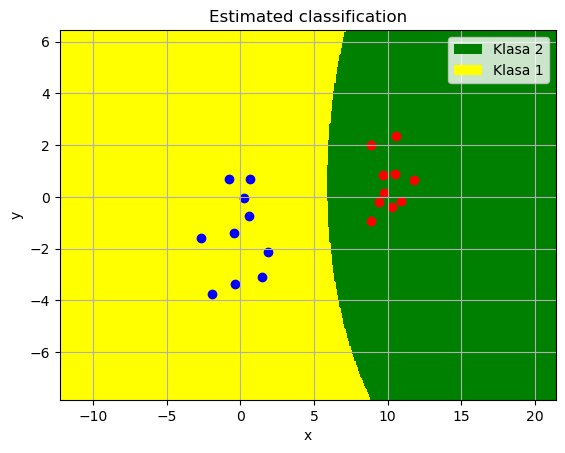

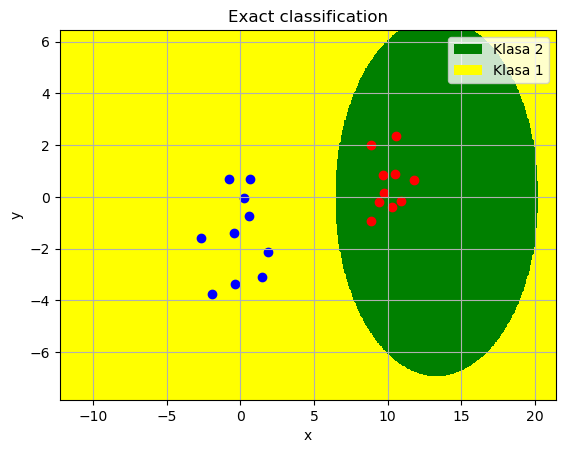

In [8]:
x1 = generate_points(covariance1, translation1, 10)
x2 = generate_points(covariance2, translation2, 10)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 20, n_2 = 20

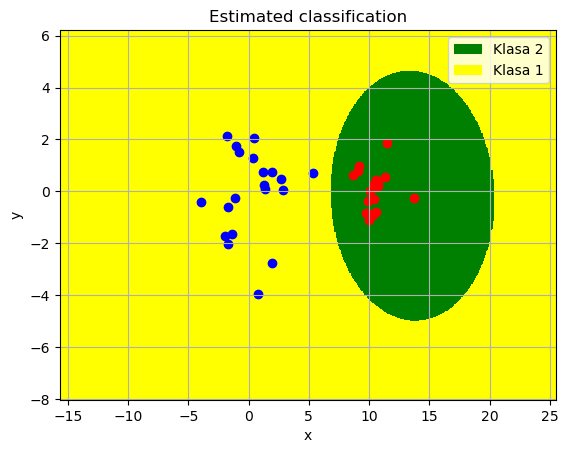

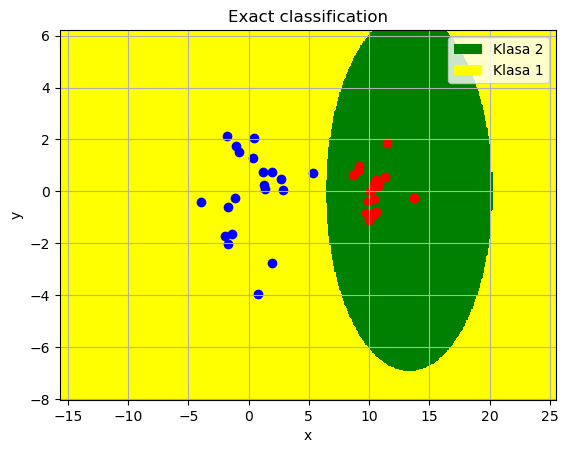

In [9]:
x1 = generate_points(covariance1, translation1, 20)
x2 = generate_points(covariance2, translation2, 20)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 50, n_2 = 50

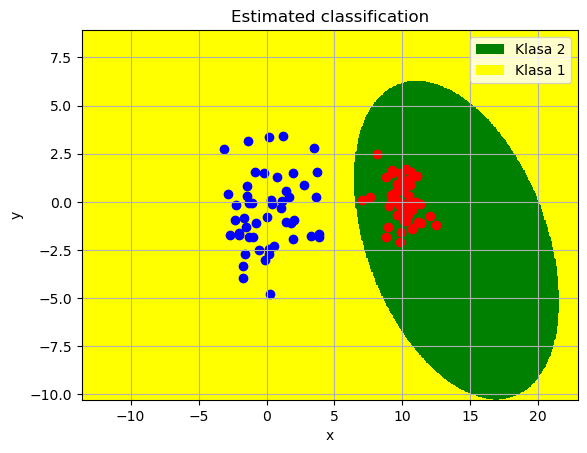

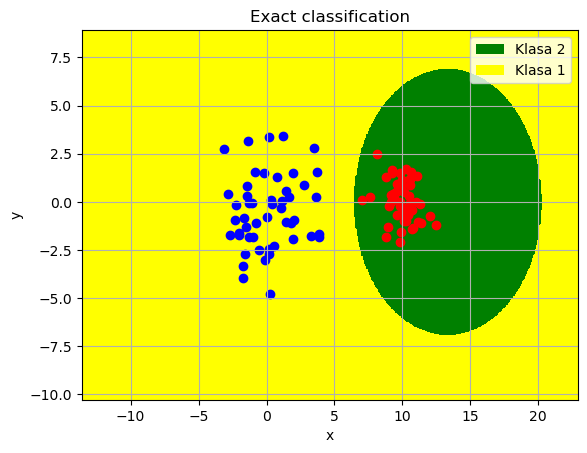

In [10]:
x1 = generate_points(covariance1, translation1, 50)
x2 = generate_points(covariance2, translation2, 50)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 100, n_2 = 100

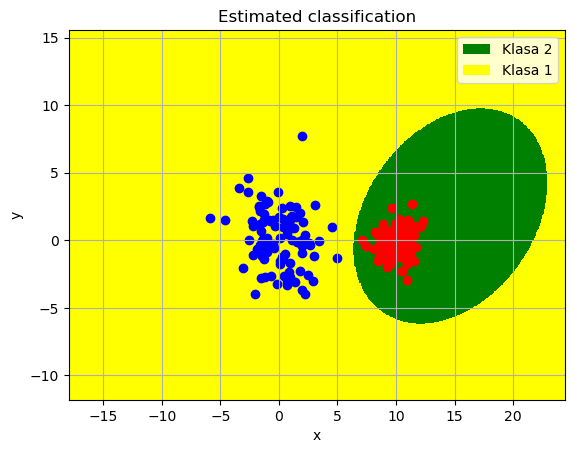

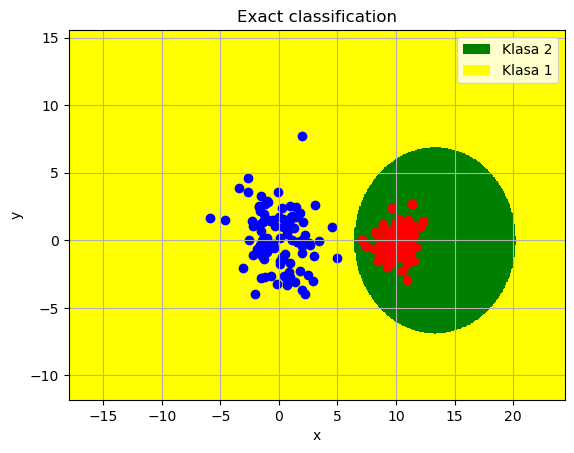

In [11]:
x1 = generate_points(covariance1, translation1, 100)
x2 = generate_points(covariance2, translation2, 100)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 200, n_2 = 200

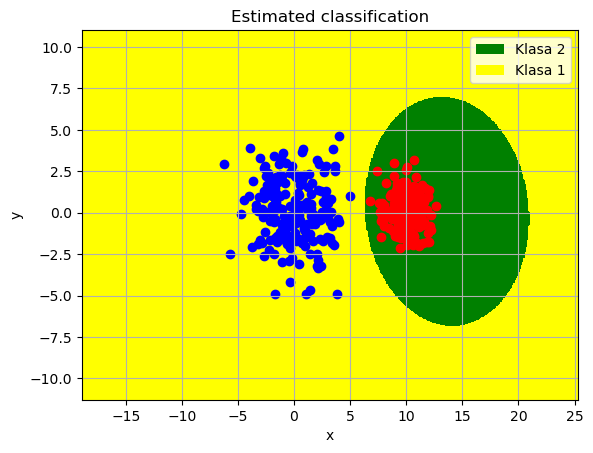

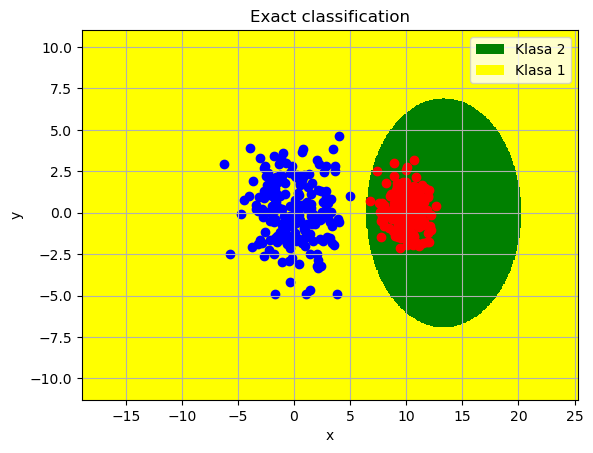

In [12]:
x1 = generate_points(covariance1, translation1, 200)
x2 = generate_points(covariance2, translation2, 200)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 500, n_2 = 500

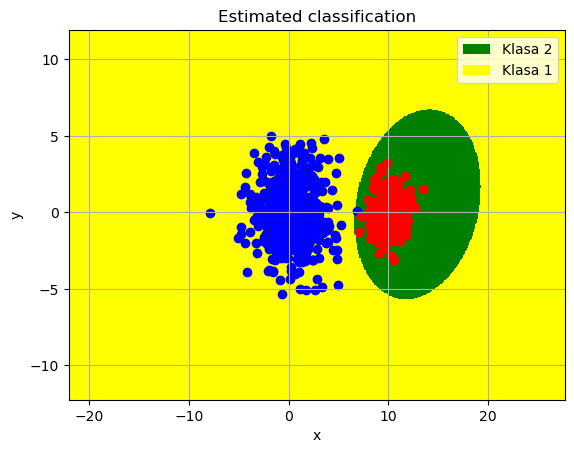

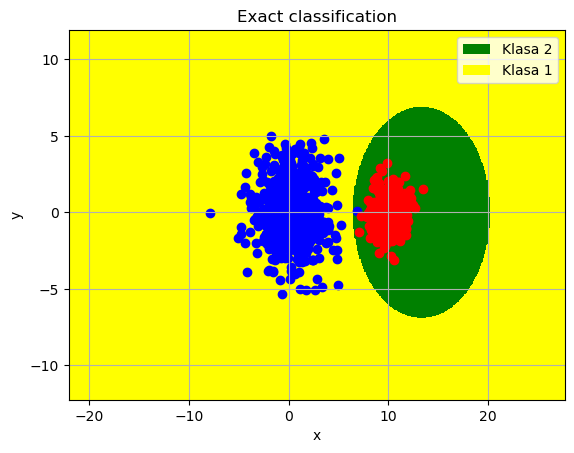

In [13]:
x1 = generate_points(covariance1, translation1, 500)
x2 = generate_points(covariance2, translation2, 500)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 5, n_2 = 500

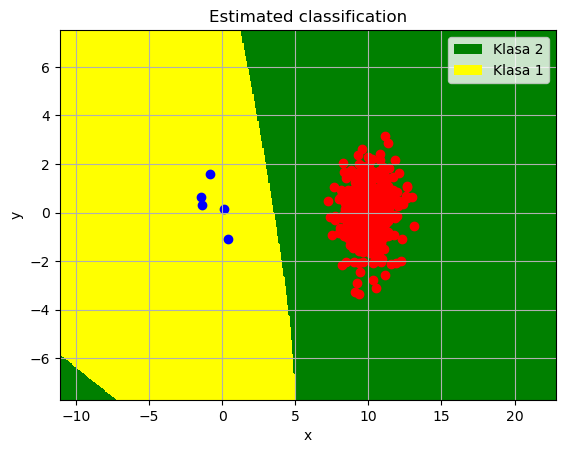

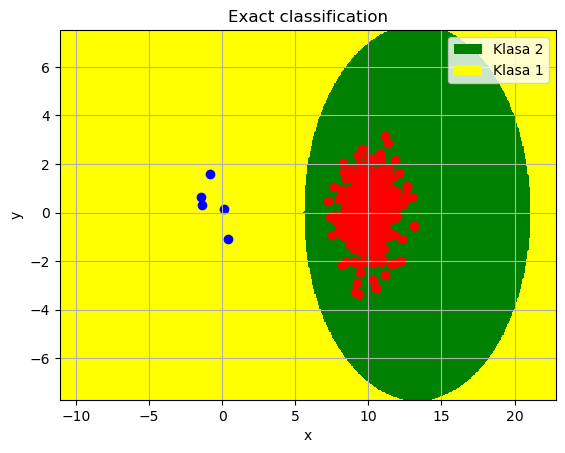

In [14]:
x1 = generate_points(covariance1, translation1, 5)
x2 = generate_points(covariance2, translation2, 500)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 5, n_2 = 50

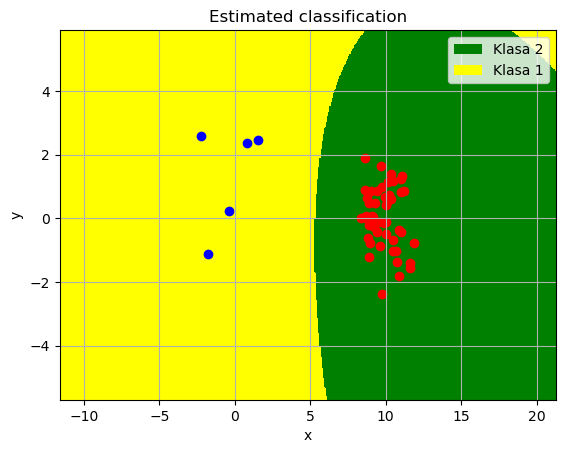

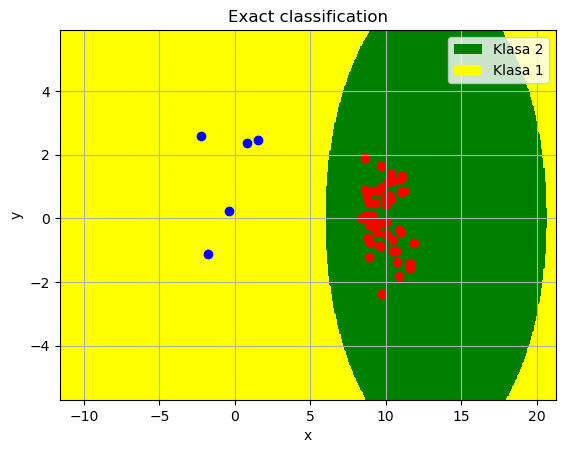

In [15]:
x1 = generate_points(covariance1, translation1, 5)
x2 = generate_points(covariance2, translation2, 50)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 50, n_2 = 500

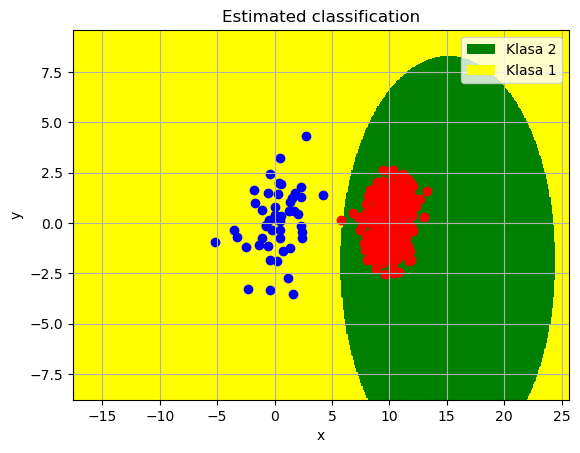

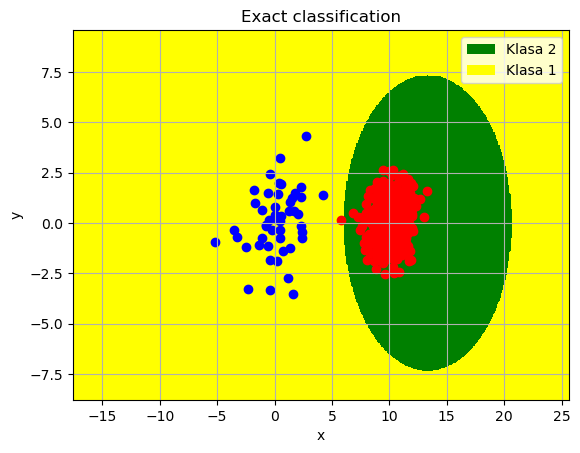

In [16]:
x1 = generate_points(covariance1, translation1, 50)
x2 = generate_points(covariance2, translation2, 500)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)

# n_1 = 10, n_2 = 200

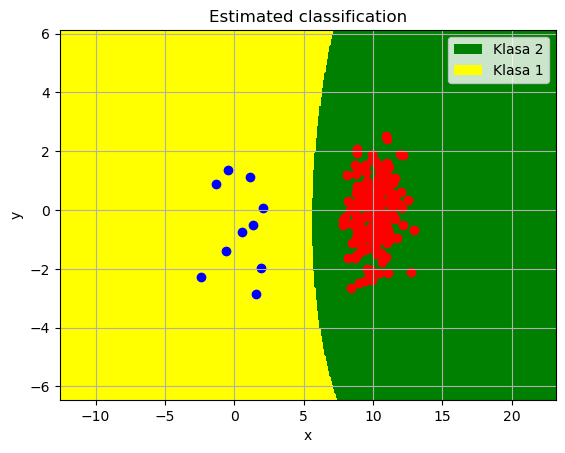

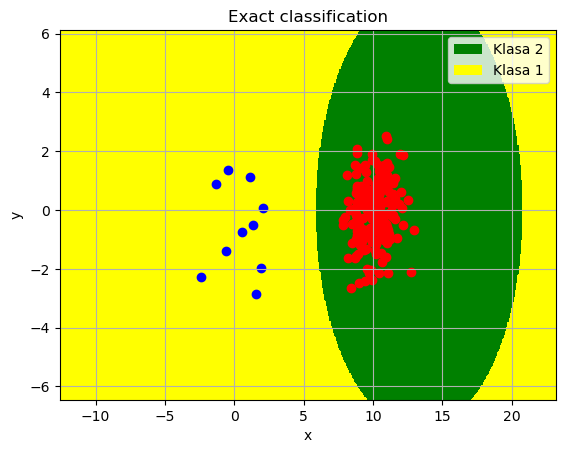

In [17]:
x1 = generate_points(covariance1, translation1, 10)
x2 = generate_points(covariance2, translation2, 200)
bayesian_estimated(x1, x2)
bayesian_exact(x1, x2, translation1, translation2, covariance1, covariance2)